In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=77b5f013dde17970fb37d6415a3c845f


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [11]:
cities

['fortuna',
 'rikitea',
 'arraial do cabo',
 'anito',
 'mataura',
 'bolshoye selo',
 'tuatapere',
 'victoria',
 'hilo',
 'port alfred',
 'kapaa',
 'fairbanks',
 'yar-sale',
 'miraflores',
 'narsaq',
 'port lincoln',
 'mogadishu',
 'los llanos de aridane',
 'airai',
 'saint-philippe',
 'anloga',
 'neiafu',
 'coquimbo',
 'ushuaia',
 'watrous',
 'nikolskoye',
 'sitka',
 'east london',
 'rio grande',
 'jamestown',
 'hobart',
 'attawapiskat',
 'kavieng',
 'necochea',
 'illoqqortoormiut',
 'malpe',
 'oda',
 'coos bay',
 'te anau',
 'yellowknife',
 'naberera',
 'vardo',
 'dubbo',
 'bolshiye uki',
 'viedma',
 'kiama',
 'bonoua',
 'taolanaro',
 'vao',
 'marsh harbour',
 'barentsburg',
 'port elizabeth',
 'jiangyou',
 'butaritari',
 'alihe',
 'punta arenas',
 'klaksvik',
 'clyde river',
 'ribeira grande',
 'castro',
 'ahipara',
 'ancud',
 'lebu',
 'puerto ayora',
 'kaitangata',
 'uvinza',
 'beyneu',
 'ust-nera',
 'bezhanitsy',
 'chuy',
 'bargal',
 'ilulissat',
 'bredasdorp',
 'cidreira',
 'thomp

In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | fortuna
Processing Record 2 of Set 13 | rikitea
Processing Record 3 of Set 13 | arraial do cabo
Processing Record 4 of Set 13 | anito
Processing Record 5 of Set 13 | mataura
Processing Record 6 of Set 13 | bolshoye selo
Processing Record 7 of Set 13 | tuatapere
Processing Record 8 of Set 13 | victoria
Processing Record 9 of Set 13 | hilo
Processing Record 10 of Set 13 | port alfred
Processing Record 11 of Set 13 | kapaa
Processing Record 12 of Set 13 | fairbanks
Processing Record 13 of Set 13 | yar-sale
Processing Record 14 of Set 13 | miraflores
Processing Record 15 of Set 13 | narsaq
Processing Record 16 of Set 13 | port lincoln
Processing Record 17 of Set 13 | mogadishu
Processing Record 18 of Set 13 | los llanos de aridane
Processing Record 19 of Set 13 | airai
Processing Record 20 of Set 13 | saint-philippe
Processing Record 21 of Set 13 | anloga
Processing Record 22 of Set 13 | neiafu
Processing Record 23 of Set 13 | coquimbo
Processing Record 24 o

Processing Record 36 of Set 16 | sao carlos
Processing Record 37 of Set 16 | buala
Processing Record 38 of Set 16 | tingi
Processing Record 39 of Set 16 | sembakung
Processing Record 40 of Set 16 | cabo san lucas
Processing Record 41 of Set 16 | kalundborg
Processing Record 42 of Set 16 | ostrovnoy
Processing Record 43 of Set 16 | lasa
Processing Record 44 of Set 16 | grindavik
Processing Record 45 of Set 16 | lazaro cardenas
Processing Record 46 of Set 16 | toliary
City not found. Skipping...
Processing Record 47 of Set 16 | bethel
Processing Record 48 of Set 16 | porto novo
Processing Record 49 of Set 16 | talnakh
Processing Record 50 of Set 16 | mar del plata
Processing Record 1 of Set 17 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 17 | tolentino
Processing Record 3 of Set 17 | solovetskiy
City not found. Skipping...
Processing Record 4 of Set 17 | dubai
Processing Record 5 of Set 17 | fairlie
Processing Record 6 of Set 17 | bull savanna
Processing Record 

Processing Record 22 of Set 20 | anadyr
Processing Record 23 of Set 20 | le vauclin
Processing Record 24 of Set 20 | coihaique
Processing Record 25 of Set 20 | kota tinggi
Processing Record 26 of Set 20 | vila velha
Processing Record 27 of Set 20 | katsuura
Processing Record 28 of Set 20 | margate
Processing Record 29 of Set 20 | damaturu
Processing Record 30 of Set 20 | arak
Processing Record 31 of Set 20 | argir
Processing Record 32 of Set 20 | falmouth
Processing Record 33 of Set 20 | broome
Processing Record 34 of Set 20 | artyk
City not found. Skipping...
Processing Record 35 of Set 20 | wanning
Processing Record 36 of Set 20 | bharatpur
Processing Record 37 of Set 20 | kupino
Processing Record 38 of Set 20 | athmallik
Processing Record 39 of Set 20 | mancio lima
Processing Record 40 of Set 20 | salalah
Processing Record 41 of Set 20 | umzimvubu
City not found. Skipping...
Processing Record 42 of Set 20 | formosa
Processing Record 43 of Set 20 | morrope
Processing Record 44 of Set

Processing Record 4 of Set 24 | lengshuijiang
Processing Record 5 of Set 24 | san carlos de bariloche
Processing Record 6 of Set 24 | roald
Processing Record 7 of Set 24 | ruteng
Processing Record 8 of Set 24 | piranhas
Processing Record 9 of Set 24 | mujiayingzi
Processing Record 10 of Set 24 | kyabe
Processing Record 11 of Set 24 | granadilla de abona
Processing Record 12 of Set 24 | laguna
Processing Record 13 of Set 24 | khudumelapye
Processing Record 14 of Set 24 | xinzhi
Processing Record 15 of Set 24 | olinda
Processing Record 16 of Set 24 | vila do maio
Processing Record 17 of Set 24 | marang
Processing Record 18 of Set 24 | milkovo
Processing Record 19 of Set 24 | kununurra
Processing Record 20 of Set 24 | ust-kuyga
Processing Record 21 of Set 24 | najran
Processing Record 22 of Set 24 | nizwa
Processing Record 23 of Set 24 | achisay
City not found. Skipping...
Processing Record 24 of Set 24 | nantucket
Processing Record 25 of Set 24 | savannah bight
Processing Record 26 of Se

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fortuna,40.5982,-124.1573,61.93,84,1,5.01,US,2021-11-29 19:35:45
1,Rikitea,-23.1203,-134.9692,76.42,76,1,22.15,PF,2021-11-29 19:33:21
2,Arraial Do Cabo,-22.9661,-42.0278,82.36,69,0,12.66,BR,2021-11-29 19:33:30
3,Anito,12.4497,125.2886,77.94,88,100,3.18,PH,2021-11-29 19:35:46
4,Mataura,-46.1927,168.8643,56.48,77,97,3.78,NZ,2021-11-29 19:33:20
5,Bolshoye Selo,57.7177,38.9334,35.53,98,100,10.47,RU,2021-11-29 19:35:46
6,Tuatapere,-46.1333,167.6833,56.82,72,100,0.89,NZ,2021-11-29 19:35:47
7,Victoria,22.2855,114.1577,71.65,68,0,7.00,HK,2021-11-29 19:32:15
8,Hilo,19.7297,-155.0900,71.62,81,90,3.44,US,2021-11-29 19:33:32
9,Port Alfred,-33.5906,26.8910,67.55,87,84,7.92,ZA,2021-11-29 19:35:47


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


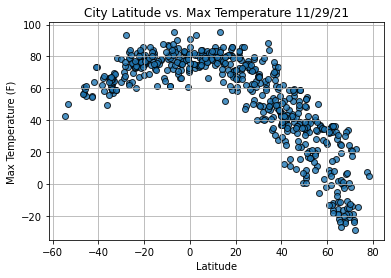

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

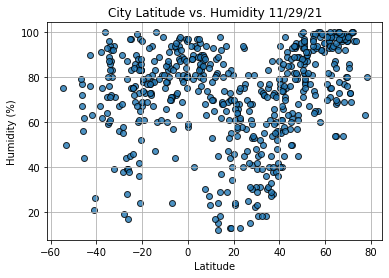

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

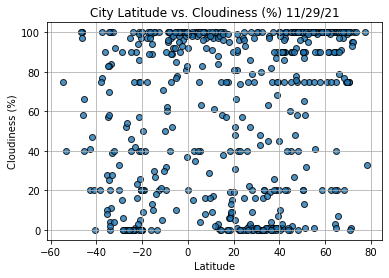

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

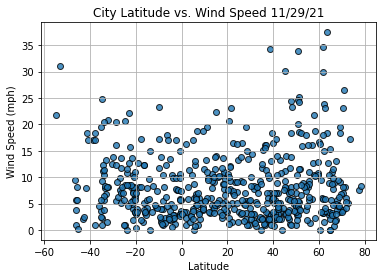

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()